In [34]:
import matplotlib.pyplot as plt #Visualizacao
import seaborn as sb #Visualizacao
import pandas as pd #Importacao de dados
import numpy as np #Numerico
import scipy as sp #Numerico
import numba as nb #Just in time
import seaborn as sb

In [35]:
df = pd.read_csv(r'Data\train.csv', sep = ',') #Le o pdf

display(df) #Visualizacao dos dados brutos

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
# Valores nulos

df.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
Spa             183
FoodCourt       183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [3]:
df.dropna(inplace = True) #Deleta dados invalidos
display(df) #Cerca de 2000 dados sao invalidos

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [6]:
HomePlanet_Categories = df['HomePlanet'].unique() #Categorias da coluna HomePlanet
Destination_Categories = df['Destination'].unique() #Categorias da coluna Destination
print(HomePlanet_Categories)
print(Destination_Categories)

['Europa' 'Earth' 'Mars']
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']


In [7]:
#Troca as categorias HomePlanet e Destination por valores numericos inteiros
for cat, i in zip(HomePlanet_Categories, range(1, 4)): df['HomePlanet'].replace(cat, i, inplace = True)
for cat, i in zip(Destination_Categories, range(1, 4)): df['Destination'].replace(cat, i, inplace = True)

#Troca os valores characters da coluna Cabin pelos respectivos inteiros da ASCII
Cabin_col = np.array(df['Cabin'], dtype = str)
for i in range(len(df['Cabin'])): 
    df['Cabin'].replace(Cabin_col[i], f'{ord(Cabin_col[i][0])}/{int(Cabin_col[i][2])}/{ord(Cabin_col[i][4])}', inplace = True)

#Nova visualizacao dos dados
display(df)

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_16368\136511714.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  for cat, i in zip(HomePlanet_Categories, range(1, 4)): df['HomePlanet'].replace(cat, i, inplace = True)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_16368\136511714.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.n

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,False,66/0/80,1,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,2,False,70/0/83,1,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,1,False,65/0/83,1,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,1,False,65/0/83,1,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,2,False,70/1/83,1,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,False,65/9/47,3,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,2,True,71/1/57,2,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,2,False,71/1/48,1,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,1,False,69/6/56,3,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [9]:
#Proximo a fazer: trocar valores booleanos (colunas VIP, CryoSleep e Transported) por inteiros
#Por exemplo: False -> 0 e True -> 1
df['VIP'] = df['VIP'].astype(int)
df['CryoSleep'] = df['CryoSleep'].astype(int)
df['Transported'] = df['Transported'].astype(int)

# Splitando colunas da cabine
df[['cabin1', 'cabin2', 'cabin3']] = df['Cabin'].str.split('/', expand=True)
display(df)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin1,cabin2,cabin3
0,0001_01,1,0,66/0/80,1,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,66,0,80
1,0002_01,2,0,70/0/83,1,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,70,0,83
2,0003_01,1,0,65/0/83,1,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,65,0,83
3,0003_02,1,0,65/0/83,1,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,65,0,83
4,0004_01,2,0,70/1/83,1,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,70,1,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,65/9/47,3,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,65,9,47
8689,9278_01,2,1,71/1/57,2,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,71,1,57
8690,9279_01,2,0,71/1/48,1,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,71,1,48
8691,9280_01,1,0,69/6/56,3,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,69,6,56


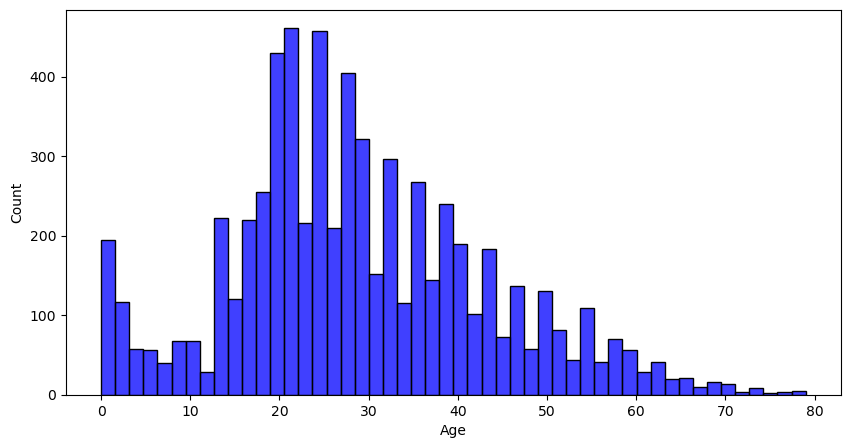

In [ ]:
# Hist de Idade
fig, ax = plt.subplots(1,1,  figsize=(10, 5))
sb.histplot(df['Age'], color='b', bins=50);